In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [172]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [173]:
def fun_view():
    ''' This Function will return the columns names as index,null_value_count,any unique character we specify & its percentage of occurance per column.'''
    
    null_values = df.apply(lambda x:x.isnull().sum())
    
    blank_char = df.apply(lambda x:x.isin(['?']).sum())
    
    percent_blank_char = df.apply(lambda x:round((x.isin(['?']).sum()/df.shape[0])*100, 2))
    
    unique_values = df.apply(lambda x:len(x.unique()))
    
    return pd.DataFrame({'null_values':null_values,
                         '? Values':blank_char,'% ? Values':percent_blank_char
                        ,'unique_values':unique_values})

print('Function Information',fun_view.__doc__)
view = fun_view()
display(view)


Function Information  This Function will return the columns names as index,null_value_count,any unique character we specify & its percentage of occurance per column.


,null_values,? Values,% ? Values,unique_values
age,0,0,0.00,73
workclass,0,1836,5.64,9
fnlwgt,0,0,0.00,21648
education,0,0,0.00,16
education.num,0,0,0.00,16
marital.status,0,0,0.00,7
occupation,0,1843,5.66,15
relationship,0,0,0.00,6
race,0,0,0.00,5
sex,0,0,0.00,2


In [174]:
df[df == '?'] = np.nan
df.head()

C:\Users\Akshay\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [175]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [176]:
for i in ['workclass','occupation','native.country']:
    print(df[i].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica

In [177]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native.country'] = df['native.country'].fillna(df['native.country'].mode()[0])

In [178]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [179]:
df.duplicated().sum()

24

In [180]:
df = df.drop_duplicates(keep = 'first')
df.shape

(32537, 15)

In [181]:
df.income.value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

In [182]:
df['income'] = df['income'].replace({'<=50K':0, '>50K':1})
df.income.value_counts()

0    24698
1     7839
Name: income, dtype: int64

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
age               32537 non-null int64
workclass         32537 non-null object
fnlwgt            32537 non-null int64
education         32537 non-null object
education.num     32537 non-null int64
marital.status    32537 non-null object
occupation        32537 non-null object
relationship      32537 non-null object
race              32537 non-null object
sex               32537 non-null object
capital.gain      32537 non-null int64
capital.loss      32537 non-null int64
hours.per.week    32537 non-null int64
native.country    32537 non-null object
income            32537 non-null int64
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


In [184]:
categorical_features = df.select_dtypes(object)
numerical_features = df.select_dtypes(exclude=object)

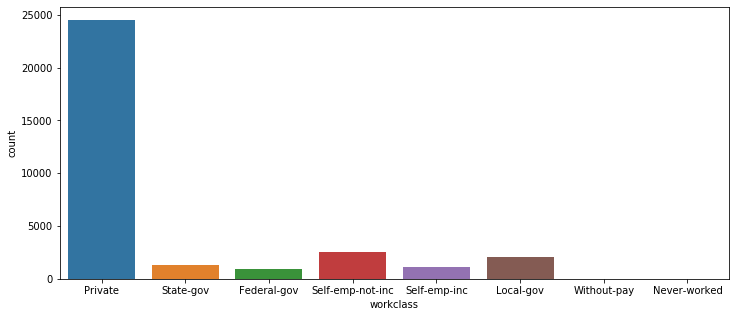

In [185]:
fig = plt.figure(figsize=(12,5))
sns.countplot(df['workclass'])

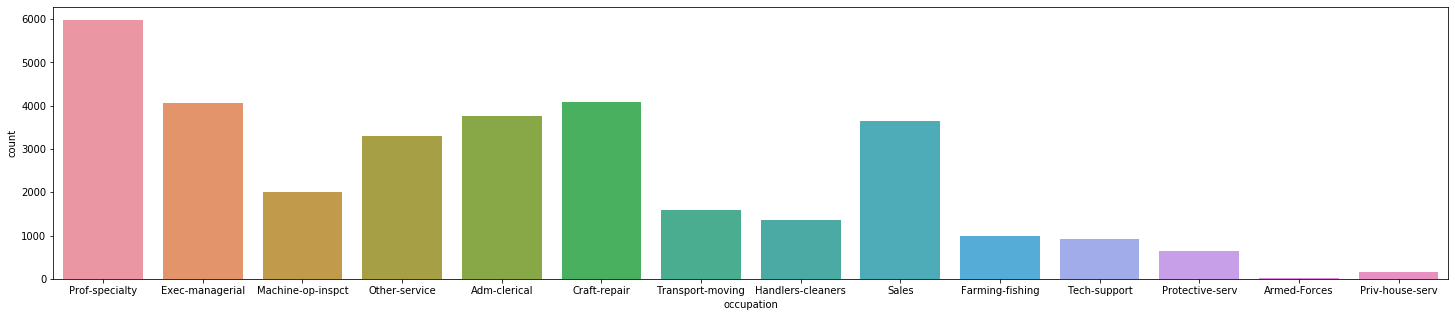

In [186]:
fig = plt.figure(figsize=(25,5))
sns.countplot(df['occupation'])

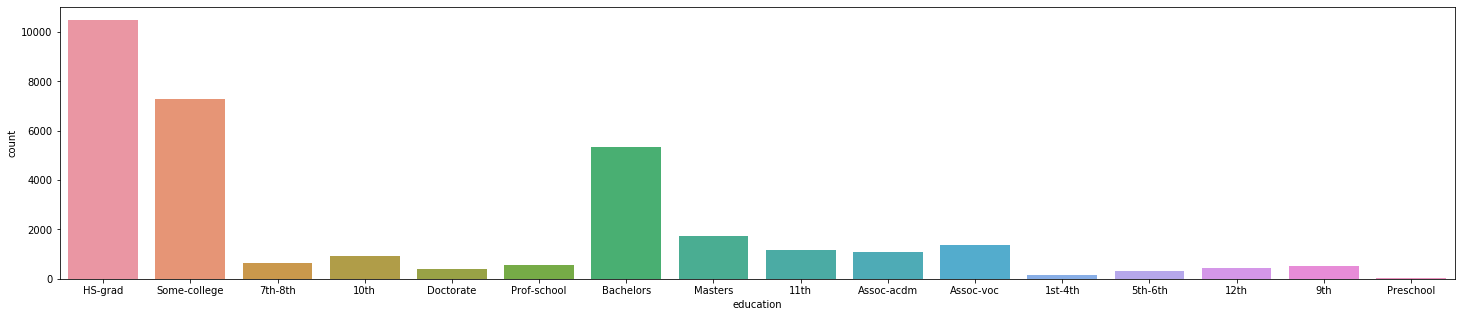

In [187]:
fig = plt.figure(figsize=(25,5))
sns.countplot(df['education'])

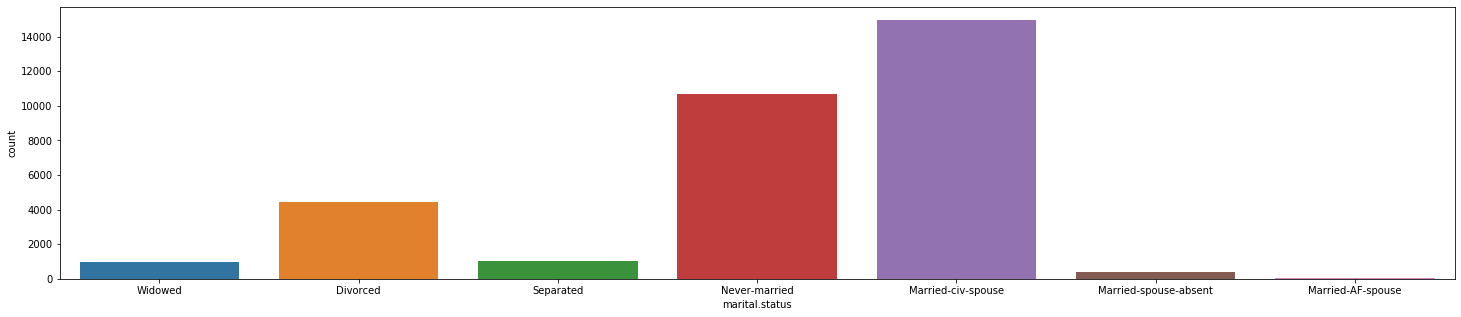

In [188]:
fig = plt.figure(figsize=(25,5))
sns.countplot(df['marital.status'])

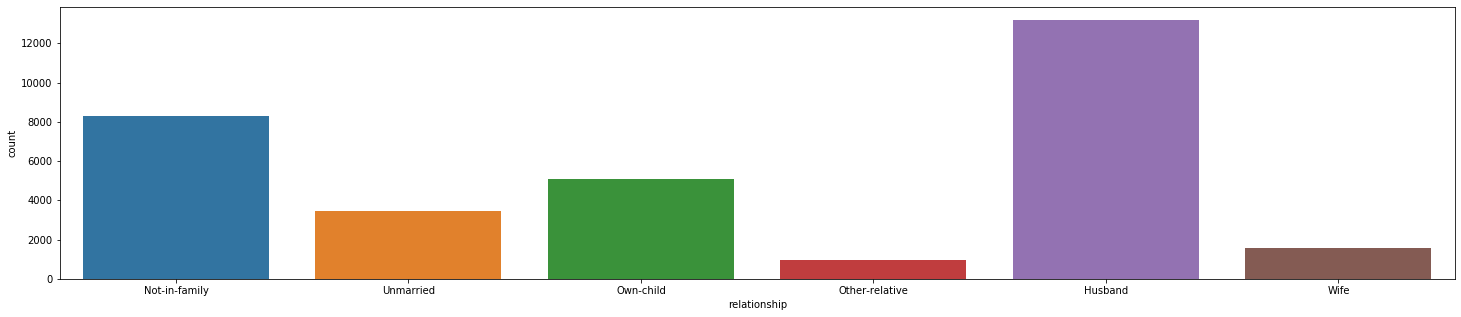

In [189]:
fig = plt.figure(figsize=(25,5))
sns.countplot(df['relationship'])

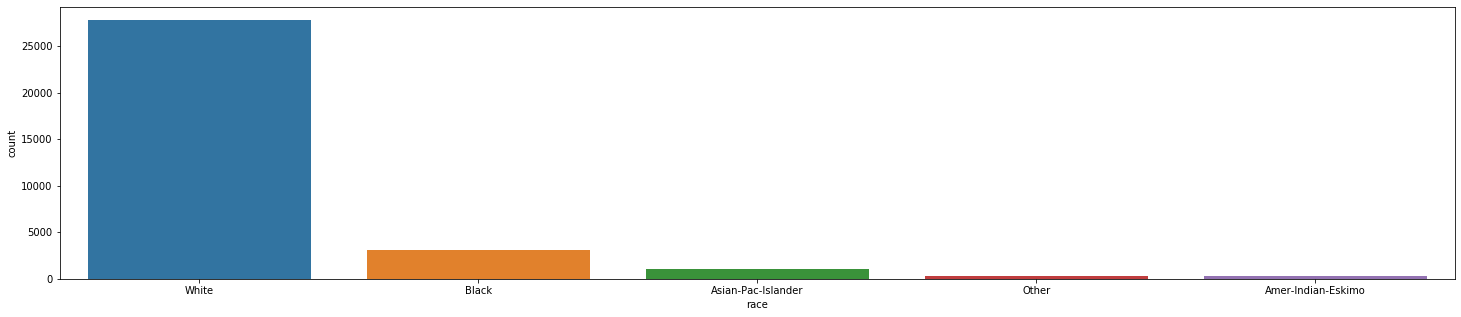

In [190]:
fig = plt.figure(figsize=(25,5))
sns.countplot(df['race'])

In [191]:
df['native.country'].value_counts().head()

United-States    29735
Mexico             639
Philippines        198
Germany            137
Canada             121
Name: native.country, dtype: int64

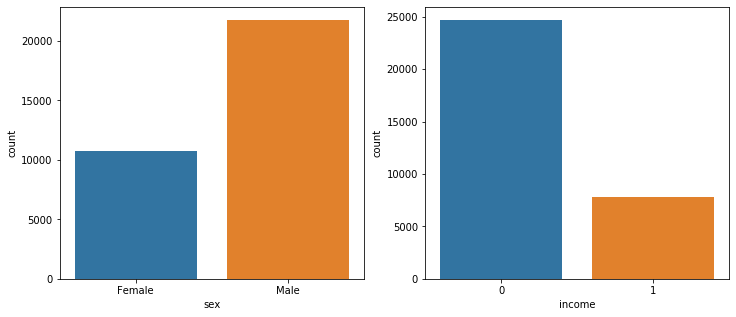

In [192]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.countplot(df['sex'], ax = ax[0])
sns.countplot(df['income'], ax = ax[1])

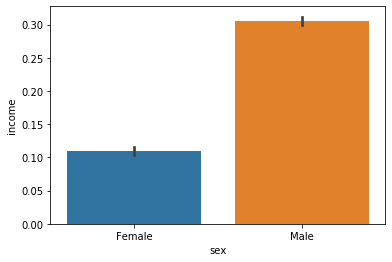

In [193]:
sns.barplot(df['sex'], df['income'])

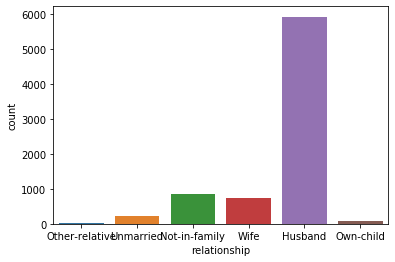

In [194]:
a = df[df['income'] == 1]
sns.countplot(a['relationship'])

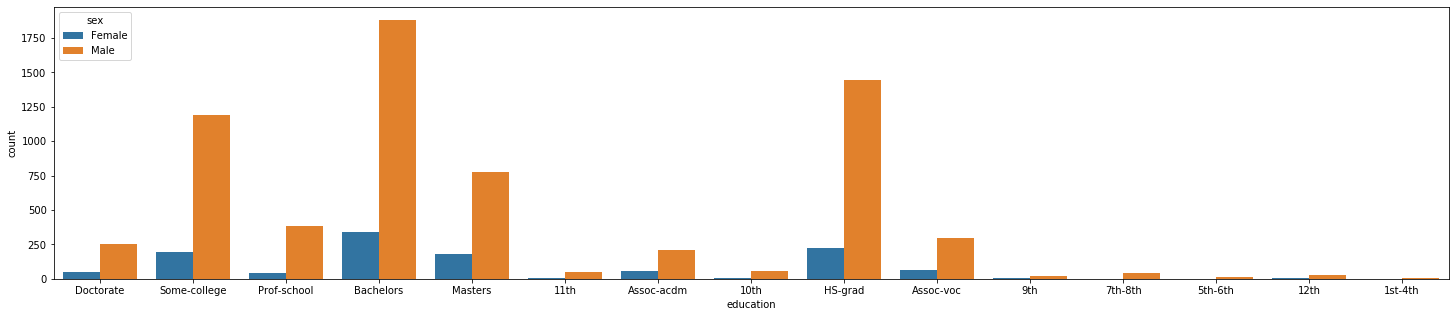

In [195]:
fig = plt.figure(figsize=(25,5))
sns.countplot(a['education'], hue = a['sex'])

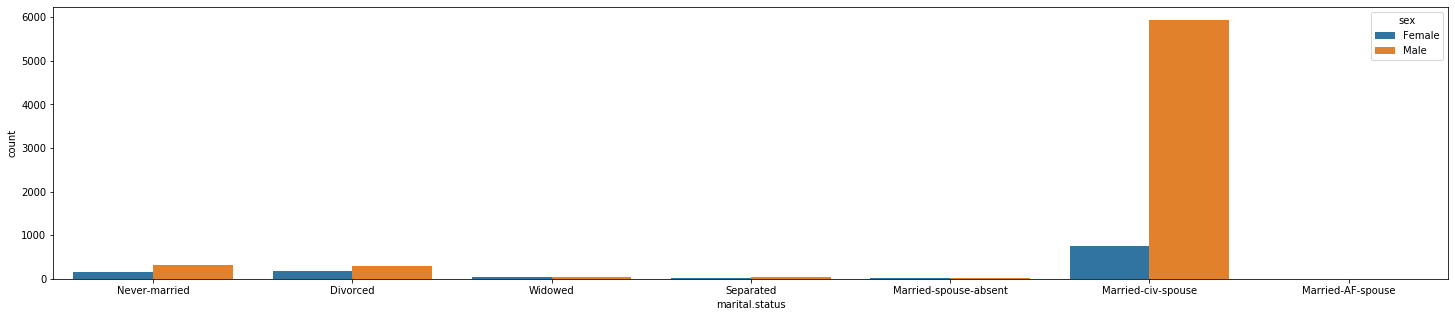

In [196]:
fig = plt.figure(figsize=(25,5))
sns.countplot(a['marital.status'], hue = a['sex'])

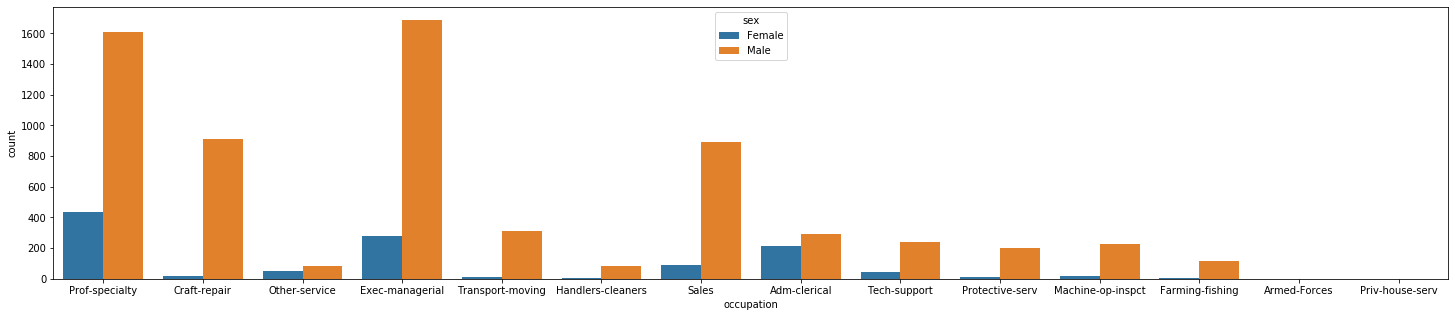

In [197]:
fig = plt.figure(figsize=(25,5))
sns.countplot(a['occupation'], hue = a['sex'])

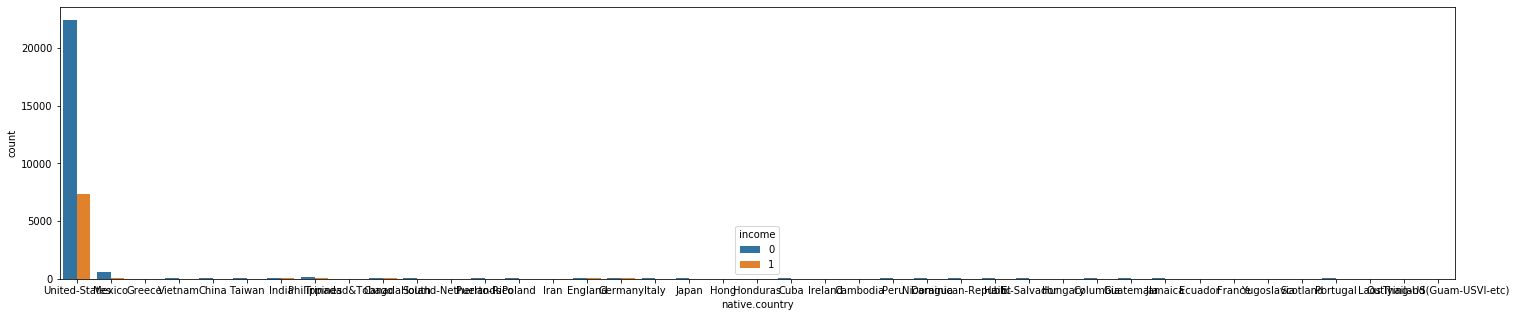

In [198]:
fig = plt.figure(figsize=(25,5))
sns.countplot(df['native.country'], hue = df['income'])

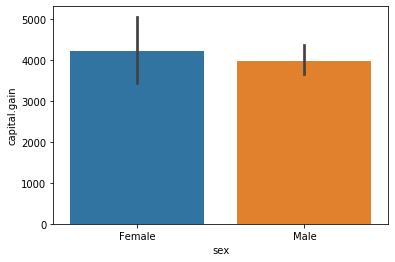

In [199]:
sns.barplot(a['sex'], a['capital.gain'])

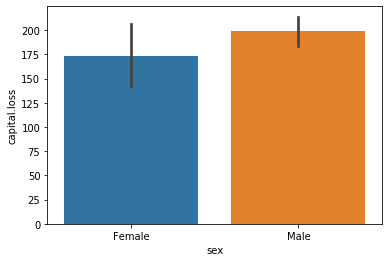

In [200]:
sns.barplot(a['sex'], a['capital.loss'])

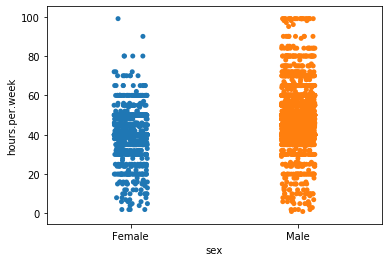

In [201]:
sns.stripplot(a['sex'],a['hours.per.week'])

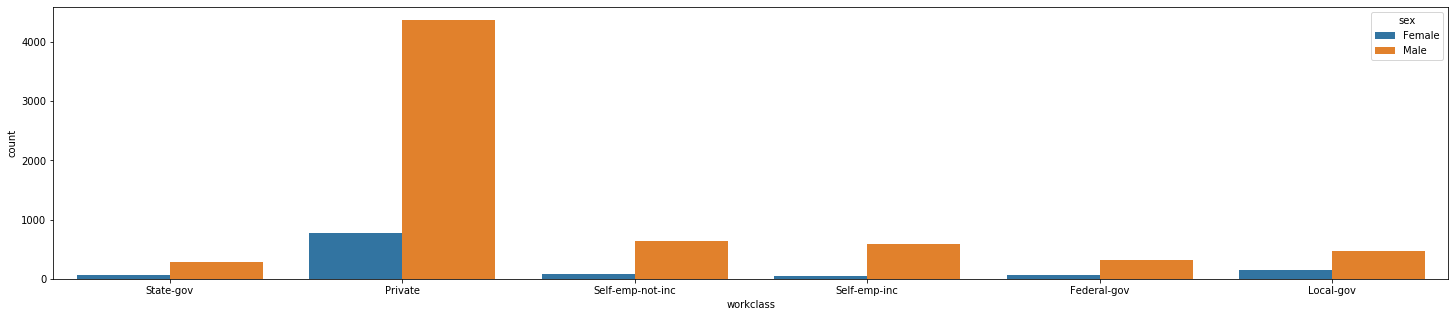

In [202]:
fig = plt.figure(figsize=(25,5))
sns.countplot(a['workclass'], hue = a['sex'])

In [203]:
b = df[df['income'] == 0]

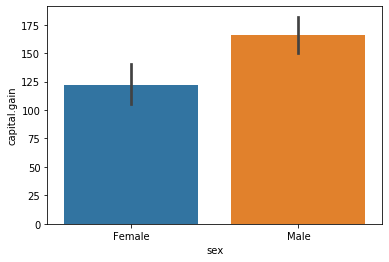

In [204]:
sns.barplot(b['sex'], b['capital.gain'])

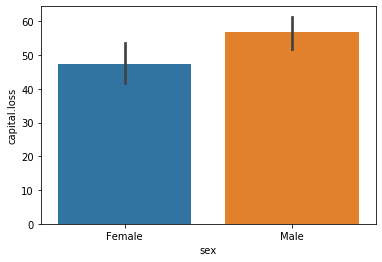

In [205]:
sns.barplot(b['sex'], b['capital.loss'])

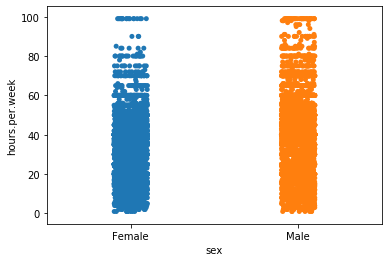

In [206]:
sns.stripplot(b['sex'],b['hours.per.week'])

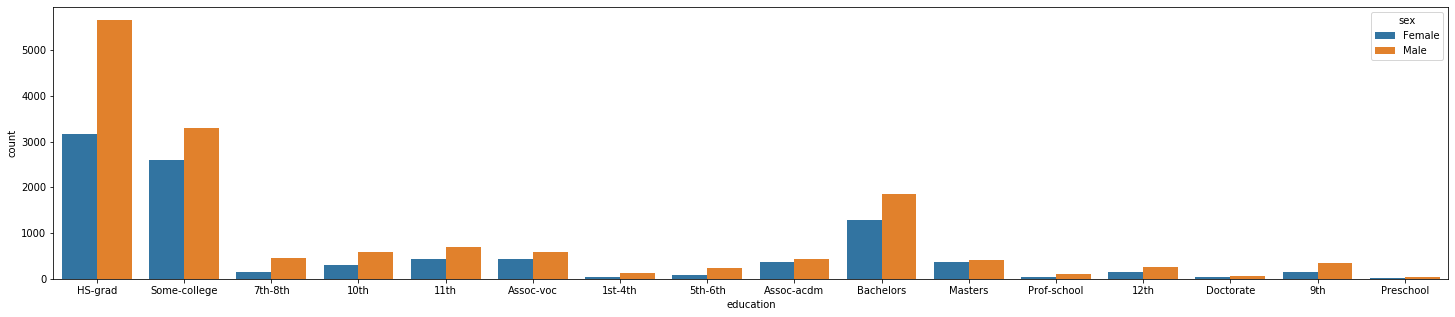

In [207]:
fig = plt.figure(figsize=(25,5))
sns.countplot(b['education'], hue = b['sex'])

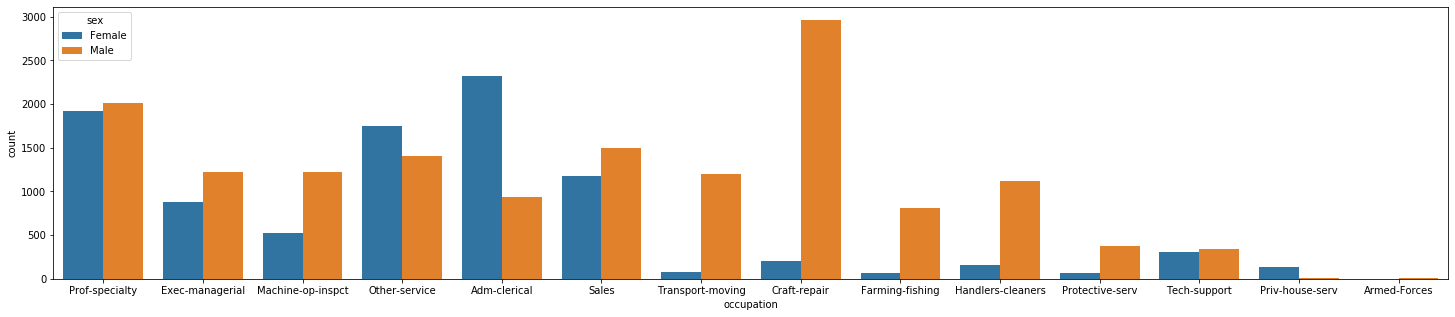

In [208]:
fig = plt.figure(figsize=(25,5))
sns.countplot(b['occupation'], hue = b['sex'])

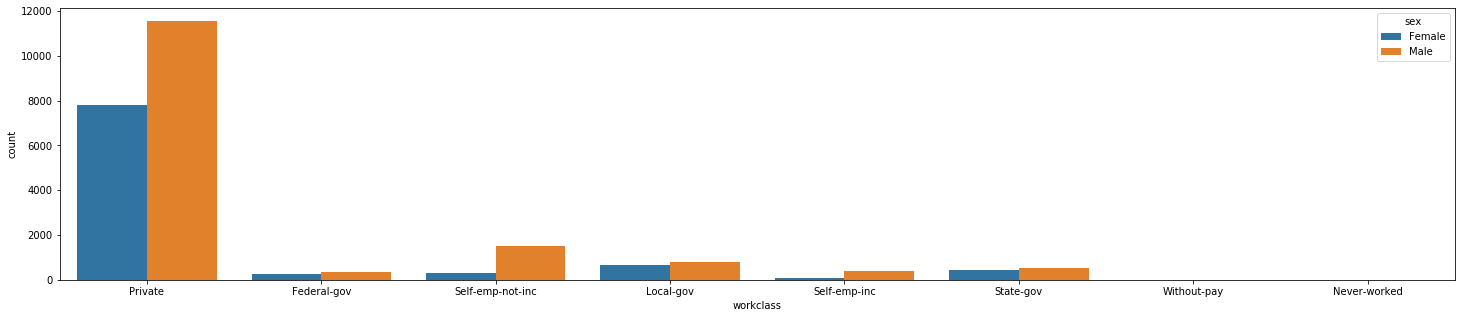

In [209]:
fig = plt.figure(figsize=(25,5))
sns.countplot(b['workclass'], hue = b['sex'])

In [210]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [211]:
categorical_features.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [212]:
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital.status'] = le.fit_transform(df['marital.status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native.country'] = le.fit_transform(df['native.country'])

In [213]:
x = df.drop('income', axis = 1)
y = df['income']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [214]:
from imblearn.over_sampling import SMOTE
s=SMOTE(ratio='minority')
xtrain_reset,ytrain_reset=s.fit_sample(x_train,y_train)
xtest_reset,ytest_reset=s.fit_sample(x_test,y_test)
print(sum(ytrain_reset==1))
print(sum(ytrain_reset==0))

17373
17373


In [215]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [216]:
x_train = pd.DataFrame(sc.fit_transform(x_train), columns= x.columns)
x_test = pd.DataFrame(sc.transform(x_test), columns= x.columns)

In [217]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(x_train, y_train)

C:\Users\Akshay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [218]:
y_pred = lor.predict(x_test)

In [219]:
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, confusion_matrix

In [220]:
print(accuracy_score(y_test, y_pred))

0.8266748617086662


In [221]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7325
           1       0.74      0.47      0.58      2437

    accuracy                           0.83      9762
   macro avg       0.79      0.71      0.73      9762
weighted avg       0.82      0.83      0.81      9762



In [222]:
print(confusion_matrix(y_test, y_pred))

[[6916  409]
 [1283 1154]]


In [223]:
print(cohen_kappa_score(y_test, y_pred))

0.4744722690830634


In [224]:
print(lor.score(x_train, y_train))
print(lor.score(x_test, y_test))

0.8238419319429199
0.8266748617086662


In [225]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)

print(accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(dtree.score(x_train, y_train))
print(dtree.score(x_test, y_test))

0.8053677525097316
[[6342  983]
 [ 917 1520]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7325
           1       0.61      0.62      0.62      2437

    accuracy                           0.81      9762
   macro avg       0.74      0.74      0.74      9762
weighted avg       0.81      0.81      0.81      9762

0.9999560922063666
0.8053677525097316


In [226]:
from sklearn.model_selection import GridSearchCV, cross_val_score
params = {'criterion':['gini', 'entropy'], 'max_depth':[1,2,3,4,5,6], 'min_samples_split':[3,4,5,6,7]}
grid = GridSearchCV(dtree, param_grid= params, cv = 5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                   

In [229]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 5}

In [228]:
grid.best_score_

0.8479034028540066

In [231]:
dtree = DecisionTreeClassifier(criterion= 'gini', max_depth= 6, min_samples_split= 5)
dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)

print("Accuracy Score is ",accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print("Training Score is ",dtree.score(x_train, y_train))
print("Test Score is ",dtree.score(x_test, y_test))

Accuracy Score is  0.8488014751075599
[[6993  332]
 [1144 1293]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7325
           1       0.80      0.53      0.64      2437

    accuracy                           0.85      9762
   macro avg       0.83      0.74      0.77      9762
weighted avg       0.84      0.85      0.84      9762

Training Score is  0.8502744237102086
Test Score is  0.8488014751075599


In [232]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

C:\Users\Akshay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [233]:
y_pred = rf.predict(x_test)

print("Accuracy Score is ",accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print("Training Score is ",rf.score(x_train, y_train))
print("Test Score is ",rf.score(x_test, y_test))

Accuracy Score is  0.8429625076828519
[[6811  514]
 [1019 1418]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7325
           1       0.73      0.58      0.65      2437

    accuracy                           0.84      9762
   macro avg       0.80      0.76      0.77      9762
weighted avg       0.84      0.84      0.84      9762

Training Score is  0.986344676180022
Test Score is  0.8429625076828519


In [235]:
params = {'criterion':['gini','entropy'], 'max_depth':[4,5,6,7,8], 'min_samples_split':[3,4,5,6,7], 
          'min_samples_leaf':[x for x in range(2,8)]}
grid = GridSearchCV(rf, param_grid= params, cv = 5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [236]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [237]:
grid.best_score_

0.8552360043907794

In [238]:
rf = RandomForestClassifier(criterion='gini', max_depth= 8, min_samples_leaf=2, min_samples_split=5)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Accuracy Score is ",accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print("Training Score is ",rf.score(x_train, y_train))
print("Test Score is ",rf.score(x_test, y_test))

C:\Users\Akshay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy Score is  0.8560745748821963
[[7006  319]
 [1086 1351]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7325
           1       0.81      0.55      0.66      2437

    accuracy                           0.86      9762
   macro avg       0.84      0.76      0.78      9762
weighted avg       0.85      0.86      0.85      9762

Training Score is  0.8592755214050494
Test Score is  0.8560745748821963


In [239]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print("Accuracy Score is ",accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print("Training Score is ",gb.score(x_train, y_train))
print("Test Score is ",gb.score(x_test, y_test))

Accuracy Score is  0.8661135013316943
[[6973  352]
 [ 955 1482]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7325
           1       0.81      0.61      0.69      2437

    accuracy                           0.87      9762
   macro avg       0.84      0.78      0.80      9762
weighted avg       0.86      0.87      0.86      9762

Training Score is  0.8666081229418222
Test Score is  0.8661135013316943


In [240]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier()
adab.fit(x_train, y_train)
y_pred = adab.predict(x_test)
print("Accuracy Score is ",accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print("Training Score is ",adab.score(x_train, y_train))
print("Test Score is ",adab.score(x_test, y_test))

Accuracy Score is  0.8642696168817865
[[6913  412]
 [ 913 1524]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7325
           1       0.79      0.63      0.70      2437

    accuracy                           0.86      9762
   macro avg       0.84      0.78      0.80      9762
weighted avg       0.86      0.86      0.86      9762

Training Score is  0.8609001097694841
Test Score is  0.8642696168817865


In [241]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print("Accuracy Score is ",accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print("Training Score is ",xgb.score(x_train, y_train))
print("Test Score is ",xgb.score(x_test, y_test))

Accuracy Score is  0.8637574267568121
[[6978  347]
 [ 983 1454]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7325
           1       0.81      0.60      0.69      2437

    accuracy                           0.86      9762
   macro avg       0.84      0.77      0.80      9762
weighted avg       0.86      0.86      0.86      9762

Training Score is  0.8654665203073546
Test Score is  0.8637574267568121


In [242]:
xgb = XGBClassifier()
xgbparams = {'booster':['gbtree', 'gblinear', 'dart'], 'max_depth' : [3,4,5,6], 'learning_rate' : [0.1, 0.3, 0.5], 
            'n_estimators' : [x for x in range(4,10)]}

grid = GridSearchCV(estimator=xgb, param_grid= xgbparams, cv = 5)

In [243]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [3

In [244]:
grid.best_params_

{'booster': 'gbtree', 'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 9}

In [245]:
grid.best_score_

0.8655982436882547

In [246]:
xgb = XGBClassifier(booster='gbtree', learning_rate= 0.5, max_depth= 6, n_estimators= 9)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print("Accuracy Score is ",accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print("Training Score is ",xgb.score(x_train, y_train))
print("Test Score is ",xgb.score(x_test, y_test))

Accuracy Score is  0.8699037082565048
[[6937  388]
 [ 882 1555]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7325
           1       0.80      0.64      0.71      2437

    accuracy                           0.87      9762
   macro avg       0.84      0.79      0.81      9762
weighted avg       0.87      0.87      0.86      9762

Training Score is  0.8752140504939627
Test Score is  0.8699037082565048


In [247]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)